# PR3C Interno

Más de lo mismo que vimos en el notebook anterior, con curvas de nivel del Hamiltoniano que parametrizan $e$ y $\omega$

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import axes3d
from IPython.display import display, clear_output

pi = -4*np.arctan(-1)

In [16]:
N = 200

e_i = 0.
e_f = 1.

w_i = 0.
w_f = 360*pi/180.

e_l = np.linspace(e_i,e_f,N)
w_l = np.linspace(w_i,w_f,N)

a = 2.5
J = 0.4

In [17]:
def Hk(e,w,a,J):
    inc = np.arccos(J/(np.sqrt(1- e**2)))
    H_f = (2+3*e*e)*(3*(np.cos(inc)**2) - 1) + 15*e*e*np.cos(2*w)*(np.sin(inc)**2)
    return(H_f)

## Tabla de valores

In [18]:
Hk_l = np.zeros((N,N))
for j,e_j in enumerate(e_l):
    for k,w_k in enumerate(w_l):
        Hk_l[j,k] = Hk(e_j,w_k,a,J)
#         print(e_j,' ',w_k,' ',Hk(e_j,w_k,a,J))

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


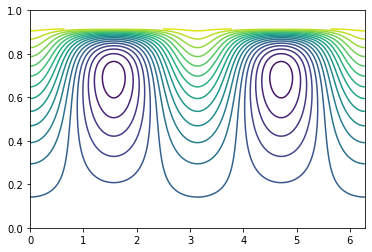

In [20]:
plt.contour(w_l,e_l,Hk_l,20)

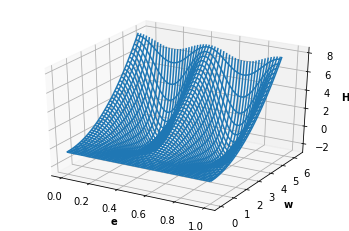

In [10]:
e_l2,wl_2 = np.meshgrid(e_l,w_l)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(e_l2,wl_2,Hk_l)
ax.set_xlabel('e',fontweight='bold')
ax.set_ylabel('w',fontweight='bold')
ax.set_zlabel('Hk',fontweight='bold')
plt.show()

#### Parámetros de nuestra particula a integrar (elegimos e,inc, y Hk ya está determinada)

In [6]:
a_x = 3.1
J_x = 0.5

e_x = 0.4                                  # Valor de e de la particula
w_x = 90*pi/180.                           # Valor de w de la particula

Hk_x = Hk(e_x,w_x,a_x,J_x)                 # Hk ya está determinado

i_x = np.arccos(J_x/(np.sqrt(1- e_x**2)))  # Valor de inc ya está determinado

t_int = 10000                               # Tiempo de integración (en años)

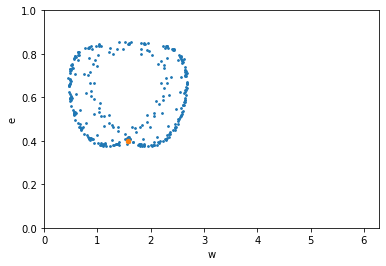

In [7]:
p=0

e_xl = []
w_xl = []

sim = rebound.Simulation()

sim.add(m=1)                                            # primaria

sim.add(m=0,a=2.5,e=e_x,omega=w_x,inc=i_x)               # particula

sim.add(m=1e-3,a=5.2,e=0,inc=0,l=0,Omega=0,pomega=0)    # secundaria

# %matplotlib inline
# fig = rebound.OrbitPlot(sim) 
# plt.show()
# ---------------------- integramos

os = sim.calculate_orbits()
sim.integrator = "ias15" 
sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
Nout = 300               # number of points to display
tmax = t_int*365.25          # integrar por 2 yr
Nmoons = 2

ecc = np.zeros((Nmoons,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles
elem = np.zeros((Nout,7))
elem2 = np.zeros((Nout,7))

for i,time in enumerate(times):

    sim.integrate(time)
    os = sim.calculate_orbits()

    e_xl.append(os[0].e)                # guardamos e
    
    w_x2 = os[0].omega                  #
                                        #
    if w_x2 < 0:                        # sumamos 360 a los w negativos
        w_x2 = w_x2 + 2*pi              #
                                        
    w_xl.append(w_x2)                   # guardamos w
    
#     fig = rebound.OrbitPlot(sim,slices=True,color=True,unitlabel="[AU]",lim=6.,limz=6.)
#     display(fig)
#     plt.close(fig)
#     clear_output(wait=True)

    Om0 = os[1].Omega*180/pi

    if Om0 < 0:
        Om0 = Om0 + 180 
        
    elem[i] = [time/365.25,os[1].a,os[1].e,os[1].inc*180/pi,os[1].l*180/pi,os[1].omega*180/pi,Om0]
    
    Om02 = os[0].Omega*180/pi

    if Om02 < 0:
        Om02 = Om02 + 180 
        
    elem2[i] = [time/365.25,os[0].a,os[0].e,os[0].inc*180/pi,os[0].l*180/pi,os[0].omega*180/pi,Om02]
    
    p = p+1                                     #
    perc = np.round((p/(Nout))*100,decimals=1)   #  porcentaje de progreso del programa
#     print(str(perc)+'%',end='\r')               #

open('Hk.txt', 'w').close()
np.savetxt('Hk.txt',elem)

open('Hk2.txt', 'w').close()
np.savetxt('Hk2.txt',elem2)
# e_l2 = []

# for i in range(len(i_l)):
#     e = np.sqrt(1 - (Jz_x/np.cos(i_l[i]))**2)
#     e_l2.append(e)
       
# p_l = e_f(i_l,Jz_ll)

# for k in range(N_J):
#     plt.plot(i_l,p_l[k])
# plt.plot(i_l,e_l2)
plt.scatter(w_xl,e_xl,s=3)
plt.scatter(w_x,e_x,s=20)
plt.xlabel('w')
plt.ylabel('e')
plt.xlim(0,360*pi/180)
plt.ylim(0,1)
plt.show()

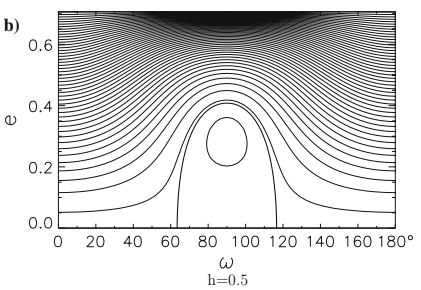

In [1]:
from IPython.display import Image
Image("kinoshita2007.png")